#EDA

**Data description -  Descripción de los datos**

45189 filas y 17 columnas.

**Columns - Columnas:**

"age": edad (numérica)

"job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")

"marital": estado civil (categórica: "married", "divorced", "single")

"education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")

"default": si dejó de pagar sus obligaciones (categórica: "yes", "no")

"balance": saldo promedio anual en euros (numérica)

"housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")

"loan": ¿tiene créditos de consumo? (categórica: "yes", "no")

"contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")

"day": último día del mes en el que fue contactada (numérica)

"month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")

"duration": duración (en segundos) del último contacto (numérica)

"campaign": número total de veces que fue contactada durante la campaña (numérica)

"pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)

"previous": número de veces que ha sido contactada antes de esta campaña (numérica)

"poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")

"y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

**Main goal- Objetivo Principal**

The main objective of the following exploratory data analysis is to understand the structure and nature of the data for the case of a database of people with term deposit service (approved/declined).

El objetivo principal del siguiente análisis exploratorio de datos es comprender la estructura y naturaleza de los datos para el caso una base de datos de personas con servicio de deposito a término (aprobado/declinado).

##Import data - Importación de datos

In [ ]:
# Import libraries - Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load data - Cargar datos
df = pd.read_csv("/content/drive/MyDrive/Análisis exploratorio de datos/dataset_banco_clean.csv")

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
8173,26,technician,married,secondary,no,351.0,yes,no,unknown,2,jun,758.0,3,-1.0,0,unknown,0
40316,57,entrepreneur,married,tertiary,no,0.0,no,no,telephone,18,jun,390.0,15,-1.0,0,unknown,0
5453,32,management,married,tertiary,no,1667.0,yes,no,unknown,23,may,345.0,3,-1.0,0,unknown,0
44893,43,blue-collar,married,secondary,no,625.0,yes,no,unknown,30,sep,175.0,1,-1.0,0,unknown,0
18426,46,services,married,secondary,no,-522.0,yes,no,cellular,31,jul,61.0,2,-1.0,0,unknown,0


The target variable is unbalanced, so techniques will be applied to mitigate this aspect -

*La variable objetivo esta desbalanceada por lo que se aplicaran técnicas para mitigar este aspecto.*

In [ ]:
# Majority/minority class - Clase mayoritaria/minoritaria
df_majority = df[df['y'] == 'no']
df_minority = df[df['y'] == 'yes']

# Subsampling of the majority class - Submuestreo de la clase mayoritaria
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Combine balanced classes - Combina las clases equilibradas
df = pd.concat([df_majority_downsampled, df_minority])

With the previous code, it addresses the problem of class imbalance by subsamster of the majority class to match the number of samples between the majority and minority classes.

*Con el código anterior se aborda el problema de desequilibrio de clases mediante el submuestreo de la clase mayoritaria para igualar la cantidad de muestras entre las clases mayoritaria y minoritaria.*

In [ ]:
# Transform categorical variables - Transformacion de variables categoricas
label_encoder = LabelEncoder()

df['y'] = label_encoder.fit_transform(df['y']) # Variable objetivo

##Data types - Tipo de dato

In [ ]:
# Inspect function - Funcion para inspeccionar
def inspect_columns(df):

    result = pd.DataFrame({
        'dtype': df.dtypes,
        'unique': df.nunique() == len(df),
        'cardinality': df.nunique(),
        'with_null': df.isna().any(),
        'null_pct': round((df.isnull().sum() / len(df)) * 100, 2),
        '1st_row': df.iloc[0],
        'random_row': df.iloc[np.random.randint(low=0, high=len(df))],
        'last_row': df.iloc[-1]
    })
    return result

inspect_columns(df)

,dtype,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row
age,int64,False,76,False,0.0,26,32,72
job,object,False,12,False,0.0,technician,technician,retired
marital,object,False,3,False,0.0,married,married,married
education,object,False,4,False,0.0,secondary,secondary,secondary
default,object,False,2,False,0.0,no,no,no
balance,float64,False,3733,False,0.0,351.0,1247.0,5715.0
housing,object,False,2,False,0.0,yes,yes,no
loan,object,False,2,False,0.0,no,no,no
contact,object,False,3,False,0.0,unknown,unknown,cellular
day,int64,False,31,False,0.0,2,23,17


With the previous function you can observe the type of data, the number of null values and random samples of rows, among other information. As relevant data, we can highlight the fact that the data set does not have null values and that most of the characteristics correspond to categorical type data. -

*Con la función anterior se puede observar el tipo de dato, la cantidad de valores nulos, muestras aleatorias de filas, entre otras informaciones. Como dato relevante se puede destacar el hecho de que el conjunto de datos no tiene valores nulos y que en su mayoria las caracteristicas corresponden a datos de tipo categorico.*

##Handle null data - Manejar datos nulos

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

The present data set has no null data.

*El presente conjunto de datos no tiene datos nulos.*

##Data distribution - Distribución de los datos

###Numerical variables - Variables númericas

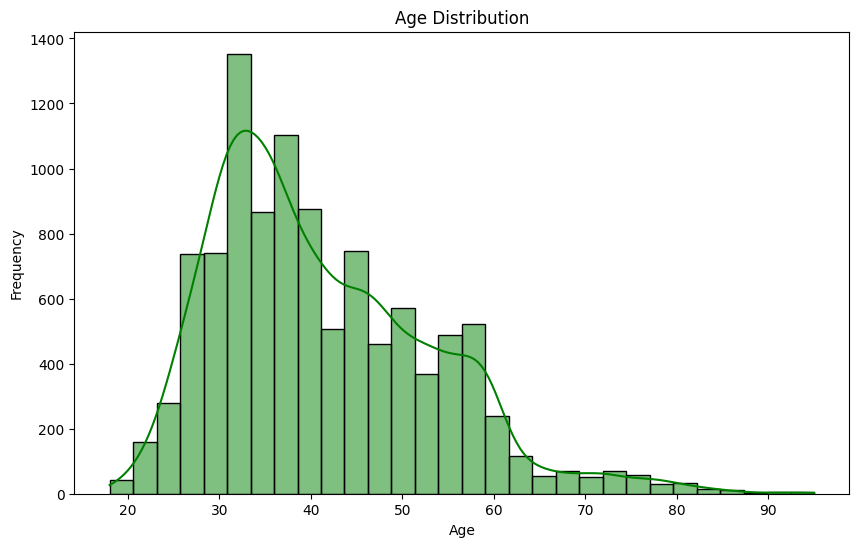

In [ ]:
# Age distribution - Distribución de edad
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

It can be seen that most of the ages of the applicants are between 30 and 40 years. This allows us to infer that most people are adults of productive age.

*Se puede observar que la mayoria de las edades de los solicitantes se encuentran entre los 30 y 40 años. Esto nos permite inferir que la mayoria de las personas son adultos en edad productiva.*

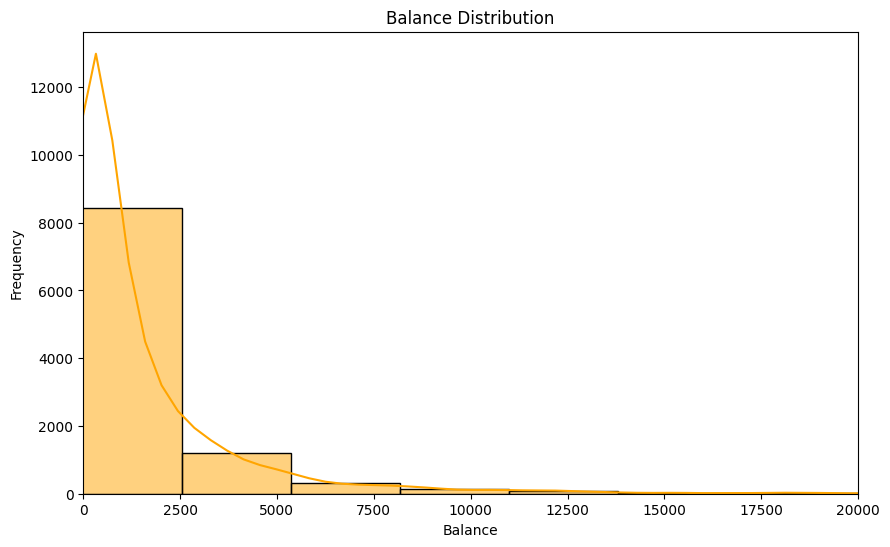

In [ ]:
# Balance distribution - Distribución de Balance
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], bins=30, kde=True, color='orange')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
x_min, x_max = 0, 20000 #Limits X axis - Limites para eje X
plt.xlim(x_min, x_max)
plt.show()

The balances (annual) on average are mostly between 0 - 2500 Euros.

*Los saldos (anuales) en promedio se ubican en su mayoria entre los 0 - 2500 Euros.*

###Binary variables - Variables binarias

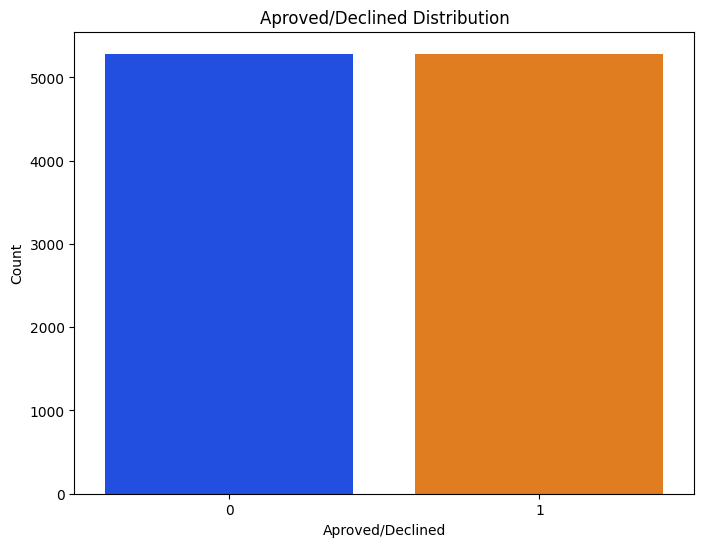

In [ ]:
# Binary variables (Y) - Aprobado/Declinado
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df, palette='bright')
plt.title('Aproved/Declined Distribution')
plt.xlabel('Aproved/Declined')
plt.ylabel('Count')
plt.show()

In this case, it is observed that the approval and disapproval of term deposit is practically the same in its distribution. Keep in mind that the original data set was unbalanced, so resume techniques were applied to balance the data in this variable.

*En este caso se observa que la aprobación y desprobación de deposito de término es practicamente igual en su distribución. Hay que tener en cuenta que el conjunto de datos original estaba desbalanceado, por lo que se aplicaron técnicas de remuestreo para balancear los datos en esta variable.*

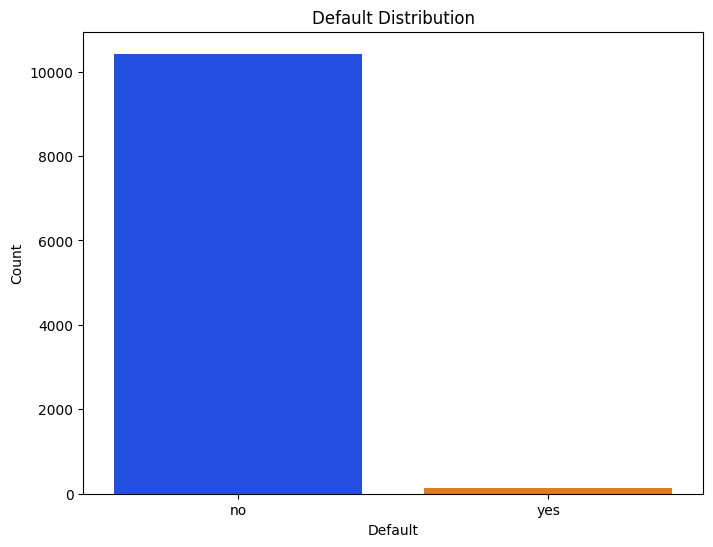

In [ ]:
# Binary variables (Default)
plt.figure(figsize=(8, 6))
sns.countplot(x='default', data=df, palette='bright')
plt.title('Default Distribution')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

In the previous graph we can see that the majority of people comply with their financial obligations, which is an indication of good payment habits on the part of applicants for the deposit service.

*En la anterior gráfica podemos observar que la mayoría de personas cumplen con sus obligaciones financieras, lo que es un indicio de buenos hábitos de pago por parte de los solicitantes del servicio de depósito.*

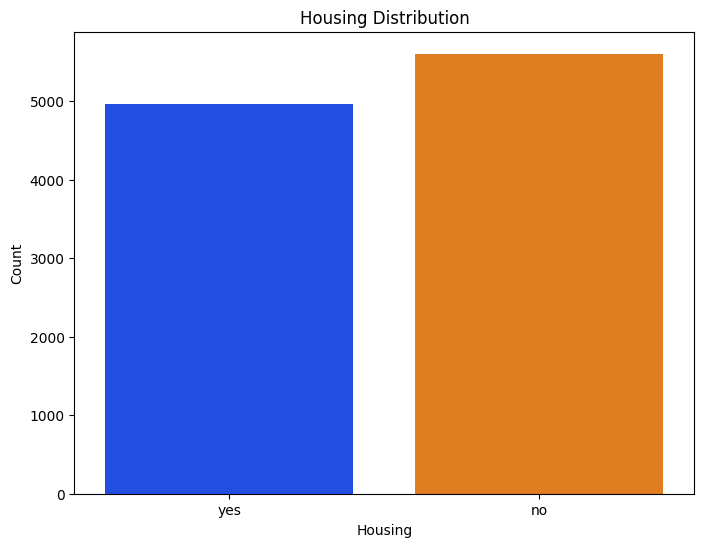

In [ ]:
# Binary variables (Housing)
plt.figure(figsize=(8, 6))
sns.countplot(x='housing', data=df, palette='bright')
plt.title('Housing Distribution')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.show()

The previous graph shows that a large part of the applicants have mortgage credit, which to a certain extent can affect the decision to approve or disapprove the service request.

*La gráfica anterior permite observar que gran parte de los solicitantes tienen crédito hipotecario lo que en cierta medida puede afectar la decisión de aprobar o desprobar la solicitud del servicio.*

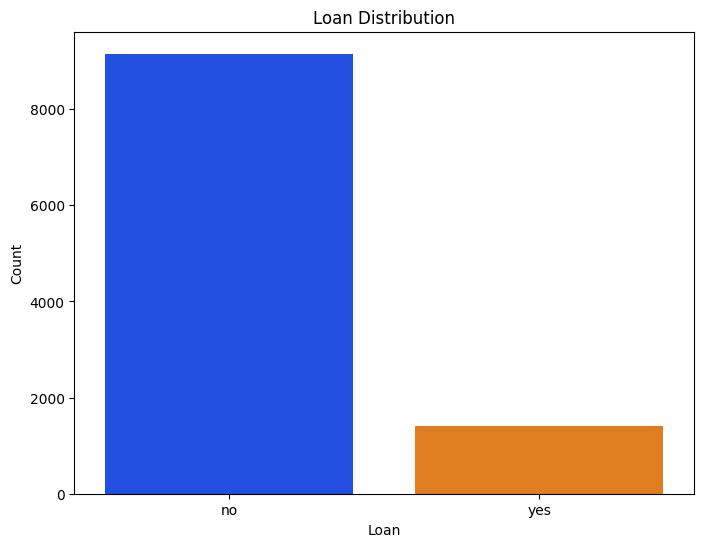

In [ ]:
# Binary variables (Loan)
plt.figure(figsize=(8, 6))
sns.countplot(x='loan', data=df, palette='bright')
plt.title('Loan Distribution')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.show()

The previous graph shows that the majority of applicants do not have consumer credit.

*La gráfica anterior permite ver que los solicitantes en su mayoria no cuentan con crédito de consumo.*

###Categorical variables - Variables categoricas

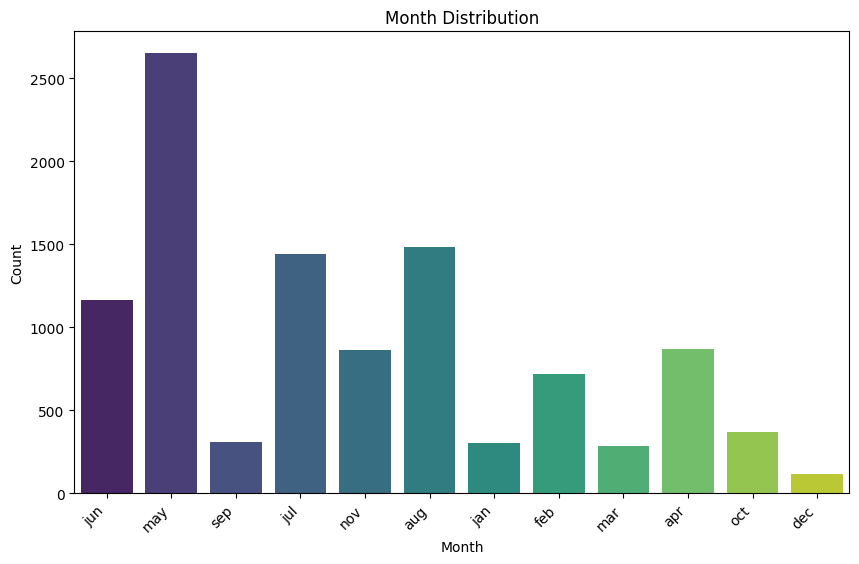

In [ ]:
# Categorical variables (Month) - Meses
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df, palette='viridis')
plt.title('Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

The months between May (the month with the highest requests) and August mean the most requests for the term deposit service.

*Los meses entre Mayo (el mes con mayores solicitudes) y Agosto significan la mayoria de solicitudes del servicio de deposito a termino.*

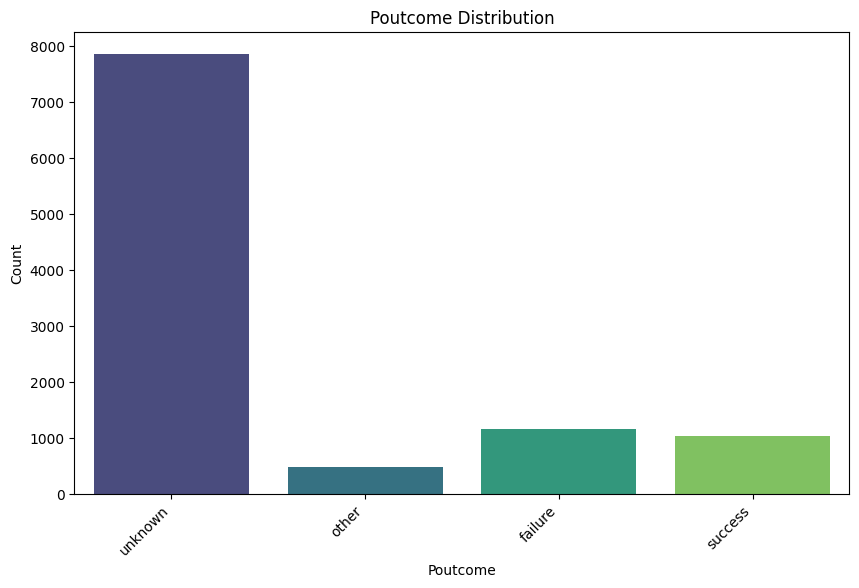

In [ ]:
# Categorical variables (Poutcome) - Campaña
plt.figure(figsize=(10, 6))
sns.countplot(x='poutcome', data=df, palette='viridis')
plt.title('Poutcome Distribution')
plt.xlabel('Poutcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

The campaign results are mostly unknown, which allows us to infer that there are inconsistencies in the monitoring of the impact of the campaigns by the promoting entity.

*Los resultados de campaña son desconocidos mayoritariamente, lo que permite inferir que se presentan incosistencias en el seguimiento del impacto de las campañas por parte de la entidad promotora.*

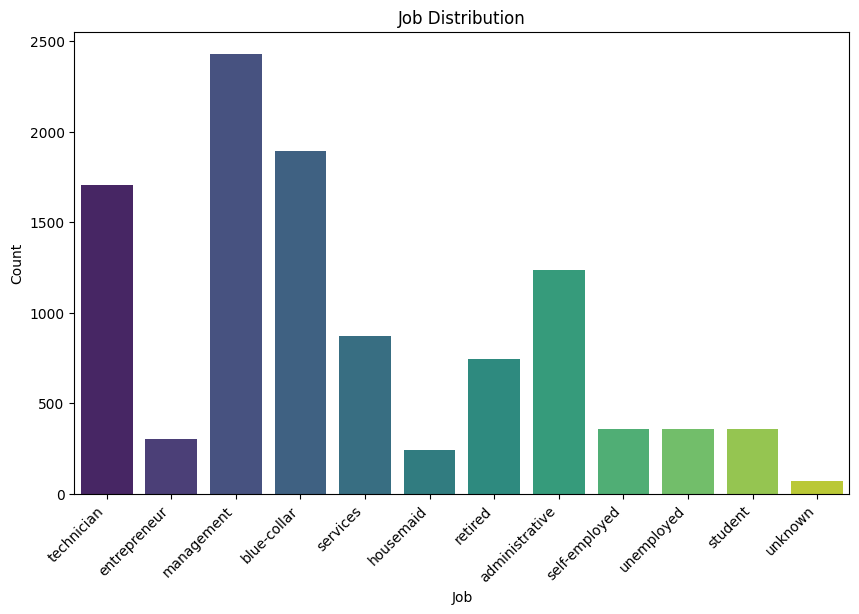

In [ ]:
# Categorical variables (Job) - Trabajo
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=df, palette='viridis')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


Most potential clients have jobs
management, technical, mechanical/manual and administration, which allows us to infer a certain level of income.

*La mayoria de posibles clientes tiene trabajos de
dirección, técnicos, mecanicos/manuales y de administración, lo que nos permite inferir cierto nivel de ingresos*

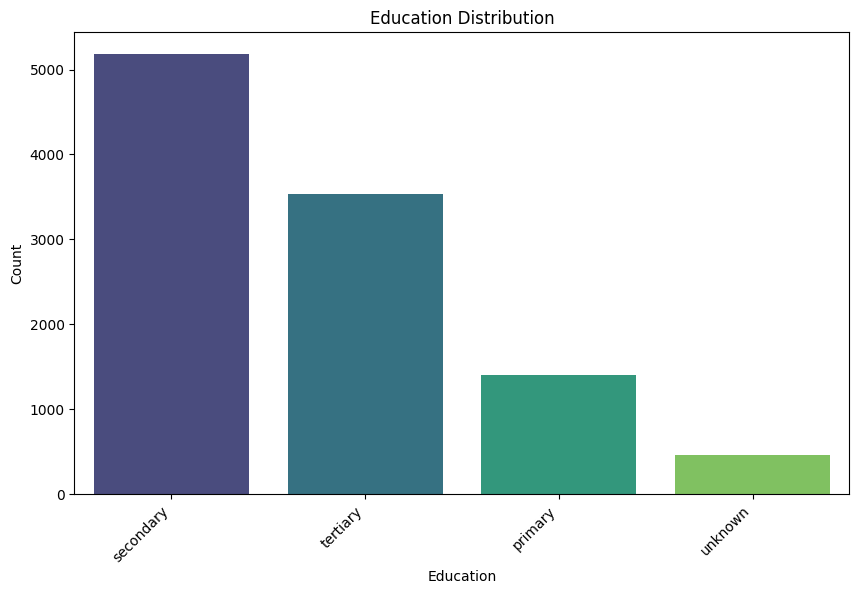

In [ ]:
# Categorical variables (Education) - Nivel de educación
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, palette='viridis')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In a large percentage, applicants have a secondary education level, followed by tertiary education to a lesser extent, and finally primary and unknown.

*En un gran porcentaje, los solicitantes tienen grado de escolaridad secundaria, en menor grado le sigue la educación terciaria y por último primaria y desconocido.*

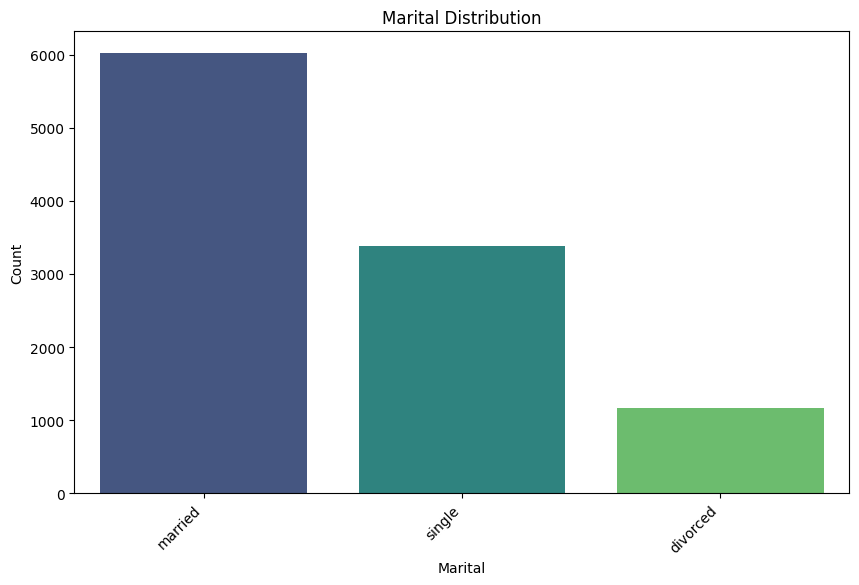

In [ ]:
# Categorical variables (Marital) - Estado civil
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', data=df, palette='viridis')
plt.title('Marital Distribution')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

The majority of applicants are married, and to a lesser extent divorced.

*La mayoria de solicitantes estan casados, y en menor medida estan divorciados.*

##Outliers - Datos Atipicos

###Detect outliers function - Función para detectar datos atipicos

In [ ]:
def detect_outliers(df, umbral=1.5):
    """
    Identifies outliers in a DataFrame using the interquartile range (IQR) method.

     Parameters:
     - dataframe: Pandas DataFrame
     - threshold: Threshold to identify outliers (default, 1.5 times the IQR)

     Returns:
     - outlier_dataframe: DataFrame that contains only the rows with outlier values
    ---------------------------------------------------------------------------------------------------
    Identifica los valores atípicos en un DataFrame utilizando el método del rango intercuartílico (IQR).

    Parámetros:
    - dataframe: DataFrame de Pandas
    - umbral: Umbral para identificar valores atípicos (por defecto, 1.5 veces el IQR)

    Retorna:
    - dataframe_atipicos: DataFrame que contiene solo las filas con valores atípicos
    """

    df_outliers = pd.DataFrame()

    for column in df.columns:

      if pd.api.types.is_numeric_dtype(df[column]):
        # Calculate IQR - Calcular el IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Define limits (upper, lower) - Definir los límites (superior, inferior)
        lower_limit = Q1 - umbral * IQR
        upper_limit = Q3 + umbral * IQR
        # Identify rows with outliers - Identificar filas con valores atípicos
        rows_outliers = (df[column] < lower_limit) | (df[column] > upper_limit)
        # Add outlier rows to df_outliers - Agregar filas atípicas a df_outliers
        df_outliers = pd.concat([df_outliers, df[rows_outliers]])

    return df_outliers

df_outliers = detect_outliers(df)

# Outliers visualization - Visualizar los valores atípicos
print("Outliers - Valores atípicos:")
print(df_outliers)

Outliers - Valores atípicos:
       age            job   marital  education default  balance housing loan  \
43437   80      housemaid   married  secondary      no    499.0      no   no   
44459   79        retired  divorced  secondary      no    631.0      no   no   
41574   76        retired   married  secondary      no    242.0      no   no   
42843   77        retired   married    unknown      no     38.0      no   no   
40551   75        retired   married  secondary      no  26452.0      no   no   
...    ...            ...       ...        ...     ...      ...     ...  ...   
45172   28  self-employed    single   tertiary      no    159.0      no   no   
45173   68        retired   married  secondary      no   1146.0      no   no   
45179   53     management   married   tertiary      no    583.0      no   no   
45182   73        retired   married  secondary      no   2850.0      no   no   
45186   72        retired   married  secondary      no   5715.0      no   no   

         c

##Correlation - Correlaciones

<ipython-input-20-11d141a3807a>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


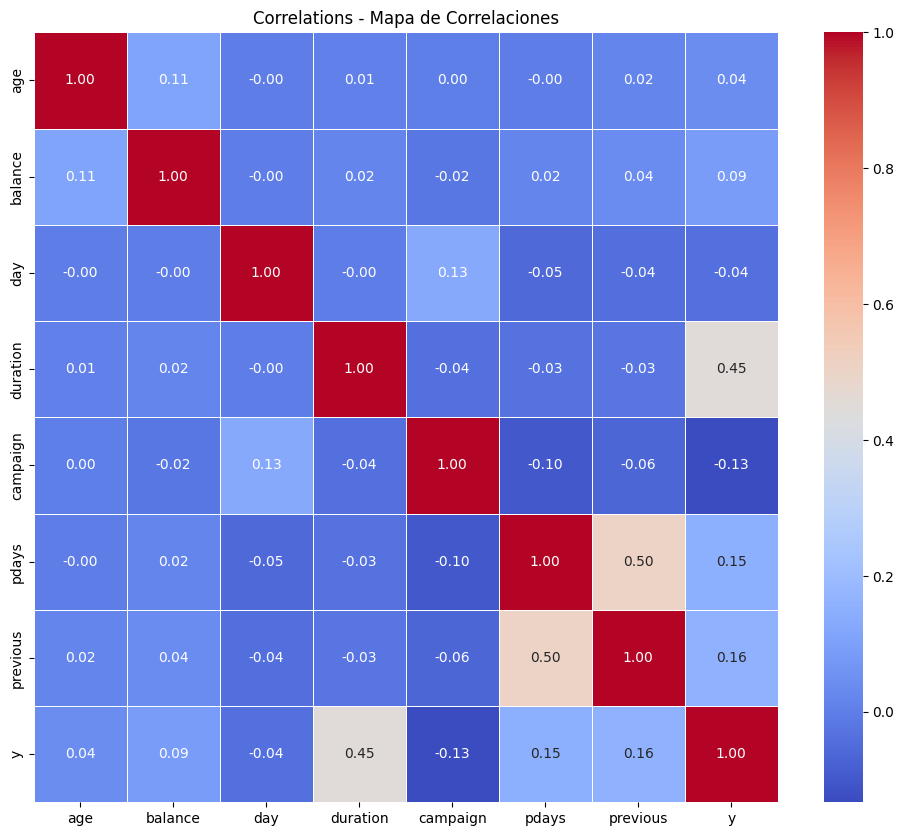

In [ ]:
def plot_correlations(df):
    """
    Creates a correlation map for a given DataFrame.

     Parameters:
     - dataframe: Pandas DataFrame

     Returns:
     -None
    -------------------------------------------------------
    Crea un mapa de correlaciones para un DataFrame dado.

    Parámetros:
    - dataframe: DataFrame de Pandas

    Retorna:
    - None
    """

   # Calculate correlation matrix - Calcular la matriz de correlaciones
   correlation_matrix = df.corr()
   # Create figure & axis - Crear una figura y un eje
   plt.figure(figsize=(12, 10))
   # Create heatmap - Crear el mapa de calor
   sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
   # Title - Título
   plt.title('Correlations - Mapa de Correlaciones')
   # Show correlations - Mostrar el mapa de correlaciones
   plt.show()

plot_correlations(df)

In the correlation graph they do not observe important relationships, although they could highlight:


* ***"duration" y "y"*** ---> Relationship between the seconds that the last contact and the fact of being approved or not the deposit service lasted.

* ***"duration" y "pdays"*** ---> Relationship between number of times contact and the number of days after the previous call to the campaign.


En el gráfico de correlaciones no se logran observar relaciones importantes, aunque se podrian destacar:

*   ***"duration" y "y"*** ---> relacion entre los segundos que duró la último contacto y el hecho de ser aprobado o no el servicio de depósito.
*   ***"duration" y "pdays"*** ---> relación entre número de veces que se realizó contacto y el número de dias transcurridos despues del llamado previo a la campaña. *texto en cursiva*



##Bivariate analysis - Análisis bivariado

In [10]:
def bivariable_plot(data, x_col, hue_col, palette=None):
  # Group by x_col y hue_col - Agrupar según x_col y hue_col
  grouped_data = data.groupby([x_col, hue_col]).size().unstack(fill_value=0)
  # Create plot - Crear el gráfico
  plt.figure(figsize=(8, 5))
  sns.barplot(data=grouped_data, x=grouped_data.index, y=1, color="green", label="Approved", palette=palette)
  sns.barplot(data=grouped_data, x=grouped_data.index, y=0, color="red", label="Declined", palette=palette)
  # Configure chart style and labels - Configurar estilo y etiquetas
  plt.xlabel(x_col)
  plt.ylabel("counts")
  plt.title(f"Análisis {hue_col} / {x_col}")
  plt.legend(title='application_status')
  plt.xticks(rotation=45)
  # Show plot - Mostrar gráfico
  plt.show()

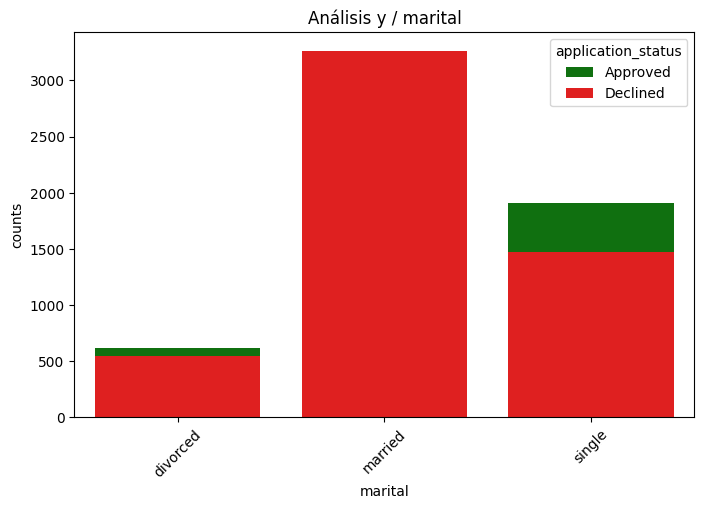

In [ ]:
bivariable_plot(df, 'marital', 'y')

The majority of approved fixed deposit applications correspond to single people, which leads us to infer that this is due to the fact that they have greater financial availability. Divorced people follow with a smaller number of applications. On the other hand, a large number of rejected applications correspond to married people, which we could say is logical because these people generally have greater financial commitments, thus reducing their ability to acquire financial services such as fixed deposits.

*La mayoria de aplicaciones aprobadas de deposito fijo corresponden a personas solteras, lo cual nos lleva a inferir que esto obedece a que tienen mayor disponibilidad económica. Le siguen los divorciados con una menor cantidad de aplicaciones. Por otro lado un gran número de aplicaciones rechazadas corresponden a personas casadas lo cual podriamos decir que es lógico debido que estas personas por lo general tienen mayores compromisos financieros, restandoles así capacidad para adquirir servicios financieros como los depósitos fijos.*

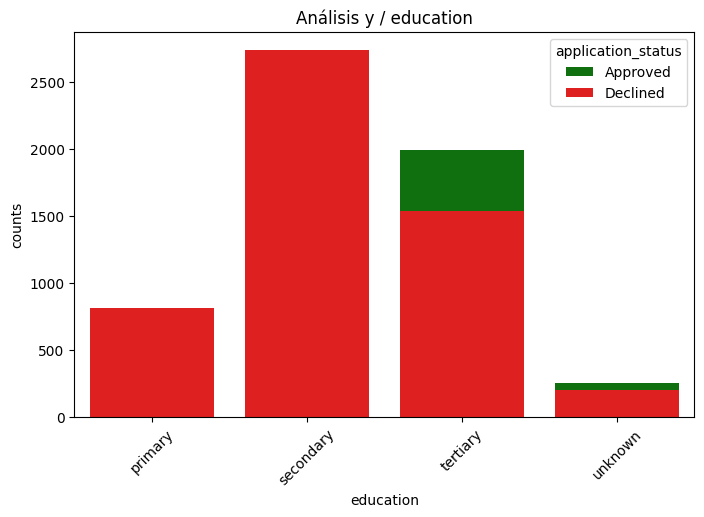

In [ ]:
bivariable_plot(df, 'education', 'y')

The majority of clients have a third-level educational level, which can allow us to infer that they are people with jobs/trades that allow them a good income, the opposite situation is found among people with lower levels of education. There is also a small percentage of clients with an unknown educational level, which may mean an error in the data registration or an educational level higher than those described.

*La mayoria de clientes tienen un nivel educativo de tercer nivel lo que puede permitirnos inferir que son personas con puestos de trabajo/oficios que les permiten buenos ingresos, situacion contraria tienen las personas con niveles inferiores de educación. Asimismo hay un pequeño porcentaje de clientes con un nivel educativo desconocido lo que puede significar un error en el registro de los datos o un nivel educativo superior a los descritos.*

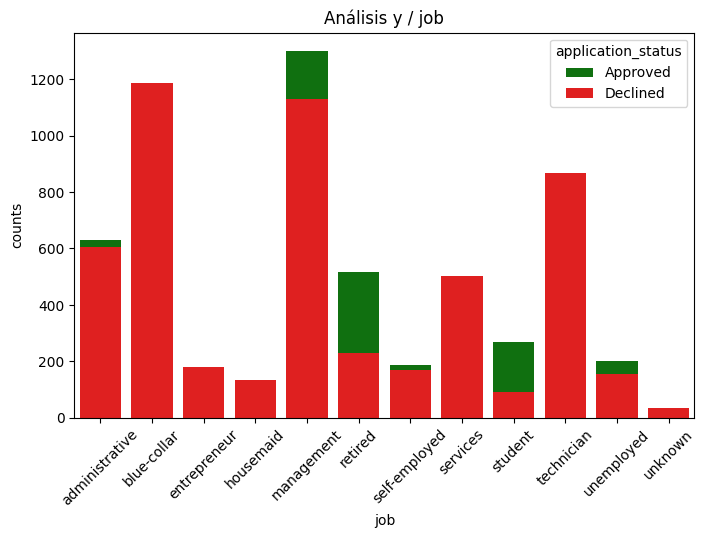

In [ ]:
bivariable_plot(df, 'job', 'y')

Approved depository services largely correspond to people with management jobs or are already retired. It is curious to note that there is a percentage of approved people whose occupation is student or unemployed, which is not very logical considering that these people do not carry out productive work and therefore do not have economic income.

*En gran medida los servicios de depósito aprobados corresponden a personas con trabajos de dirección o ya están retirados. Es curioso observar que hay un porcentaje de personas aprobadas cuya ocupación es estudiante o desempleado, lo cual no es muy lógico teniendo en cuenta que estás personas no ejercen una labor productiva por ende no cuentan con ingresos económicos.*

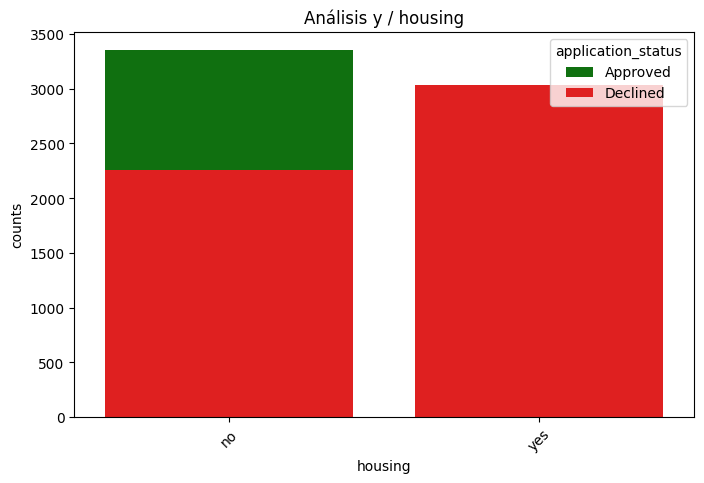

In [ ]:
bivariable_plot(df, 'housing', 'y')

In all, clients with an approved deposit do not have mortgage loans, so it can be thought that they have greater availability of resources to acquire other services, such as in this case a fixed deposit.

*En su totalidad los clientes con deposito aprobado no tienen créditos hipotecarios, por lo que se puede pensar que tienen mayor disponibilidad de recursos para adquirir otros servicios, como en este caso el deposito fijo.*

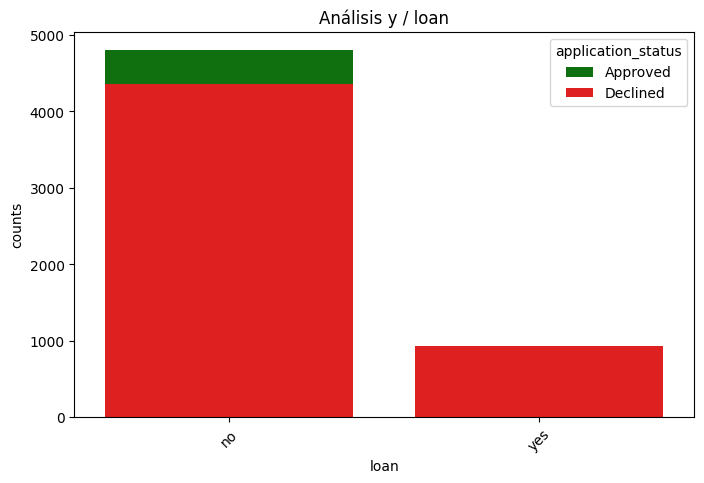

In [ ]:
bivariable_plot(df, 'loan', 'y')

As a whole, clients with an approved deposit do not have consumer credit, it can be inferred that they have greater financial availability to acquire other services, such as in this case fixed deposit.

*En su totalidad los clientes con depósito aprobado no tienen créditos de consumo, se puede inferir que tienen mayor disponibilidad financiera para adquirir otros servicios, como en este caso el deposito fijo.*

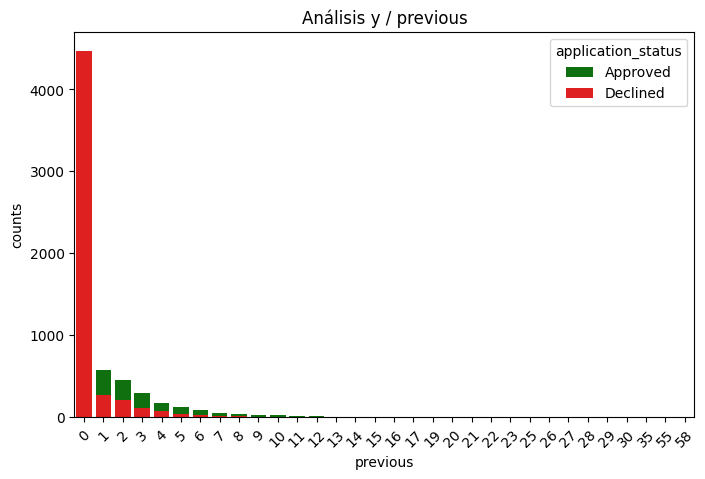

In [11]:
bivariable_plot(df, 'previous', 'y')

The number of contacts made to each customer with approved service prior to the campaign decreases as the number of calls increases. The above indicates that no more than approximately 10 calls were needed to complete the sale of the service.

*El número de contactos hechos a cada cliente con servicio aprobado previo a la campaña va decreciendo a medida que aumenta el número de llamados. Lo anterior indica que no se necesitaron mas de 10 llamados aproximadamente para concretar la venta del servicio.*

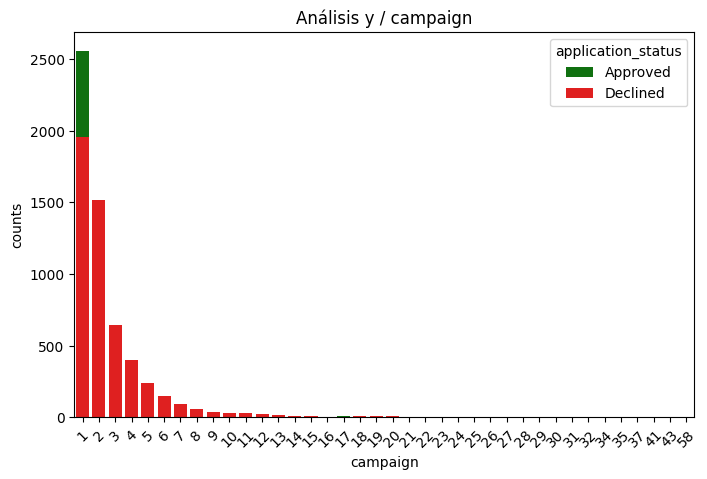

In [13]:
bivariable_plot(df, 'campaign', 'y')

The number of calls made to each person (with approved service) during the campaign is limited to 1 contact, which could lead us to think that the previous work (see y/previous graph) was effective.

*El número de llamados hechos a cada persona (con servicio aprobado) durante la campaña se limita a 1 contacto, lo que podría llevarnos a pensar que el trabajo previo (ver gráfica de y/previous) fue efectivo.*